In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
import numpy as np

In [2]:
X, y = loadlocal_mnist(
        images_path='/Users/gaozhenyu/Desktop/Netherlands/MyENN/mnist/train-images-idx3-ubyte', 
        labels_path='/Users/gaozhenyu/Desktop/Netherlands/MyENN/mnist/train-labels-idx1-ubyte')

numbers = [0, 1, 2] # number 2 > number 1
number_of_classification = len(numbers)
number_of_sampling = 100

list_y = y.tolist()


import random
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(random.sample(li, number_of_sampling))    
    
samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

In [3]:
# x_output = np.zeros(samplesize*number_of_classification).reshape(samplesize,number_of_classification)
# for count,ele in enumerate(y[digits_indexes].tolist()):
#     x_output[count][ele] = 1
# x_outputs = [tuple(c) for c in x_output.tolist()]

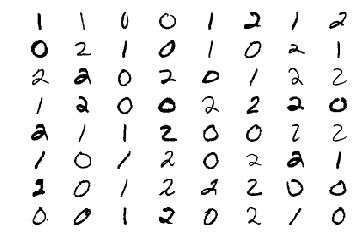

In [4]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, len(x_inputs))]).reshape(28,28), cmap='Greys')
plt.show()

In [5]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [6]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        pred_outputs[pred_outputs==2] = numbers[2]
        pred_outputs[pred_outputs==1] = numbers[1]
        pred_outputs[pred_outputs==0] = numbers[0]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 1000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist3")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.33102 stdev: 0.10256
Best fitness: 0.58333 - size: (3, 235) - species 2 - id 155
Average adjusted fitness: 0.271
Mean genetic distance 2.908, standard deviation 0.382
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.38586 stdev: 0.09522
Best fitness: 0.66333 - size: (4, 237) - species 5 - id 252
Average adjusted fitness: 0.223
Mean genetic distance 3.022, standard deviation 0.407
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 13.703 sec (12.045 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.42087 stdev: 0.10332
Best fitness: 0.66333 - size: (4, 237) - species 5 - id 252
Average adjusted fitness: 0.290
Mean genetic distance 3.049, standard deviation 0.408
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 15.765 sec (1

Population's average fitness: 0.63012 stdev: 0.11444
Best fitness: 0.87000 - size: (12, 254) - species 10 - id 3093
Average adjusted fitness: 0.252
Mean genetic distance 3.220, standard deviation 0.452
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 12.603 sec (12.908 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62641 stdev: 0.12092
Best fitness: 0.87000 - size: (12, 254) - species 10 - id 3093
Average adjusted fitness: 0.280
Mean genetic distance 3.229, standard deviation 0.463
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 13.164 sec (12.925 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63438 stdev: 0.12632
Best fitness: 0.87000 - size: (12, 254) - species 10 - id 3093
Average adjusted fitness: 0.349
Mean genetic distance 3.267, standard deviation 0.464
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 12.256 sec (12.761 avera

Population's average fitness: 0.69442 stdev: 0.11972
Best fitness: 0.91667 - size: (11, 242) - species 14 - id 6196
Average adjusted fitness: 0.308
Mean genetic distance 3.246, standard deviation 0.504
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 12.227 sec (13.004 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.70683 stdev: 0.11998
Best fitness: 0.92000 - size: (13, 244) - species 23 - id 6983
Average adjusted fitness: 0.319
Mean genetic distance 3.261, standard deviation 0.533
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.062 sec (13.117 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69359 stdev: 0.12126
Best fitness: 0.92000 - size: (13, 244) - species 23 - id 6983
Average adjusted fitness: 0.372
Mean genetic distance 3.235, standard deviation 0.529
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 10.740 sec (13.049 avera

Population's average fitness: 0.70752 stdev: 0.11474
Best fitness: 0.92333 - size: (13, 243) - species 23 - id 10069
Average adjusted fitness: 0.315
Mean genetic distance 3.240, standard deviation 0.607
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 10.982 sec (10.891 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.71673 stdev: 0.10781
Best fitness: 0.92333 - size: (13, 243) - species 23 - id 10069
Average adjusted fitness: 0.332
Mean genetic distance 3.255, standard deviation 0.586
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 10.741 sec (10.885 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.70822 stdev: 0.12007
Best fitness: 0.92333 - size: (13, 243) - species 23 - id 10069
Average adjusted fitness: 0.492
Mean genetic distance 3.228, standard deviation 0.551
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 10.893 sec (10.904 av

Population's average fitness: 0.70415 stdev: 0.11800
Best fitness: 0.92333 - size: (9, 243) - species 1 - id 15189
Average adjusted fitness: 0.339
Mean genetic distance 3.200, standard deviation 0.668
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 10.993 sec (10.770 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.70854 stdev: 0.10684
Best fitness: 0.92333 - size: (9, 243) - species 1 - id 15189
Average adjusted fitness: 0.325
Mean genetic distance 3.127, standard deviation 0.656
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 11.298 sec (10.812 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.70896 stdev: 0.11393
Best fitness: 0.92333 - size: (9, 243) - species 1 - id 15189
Average adjusted fitness: 0.340
Mean genetic distance 3.144, standard deviation 0.671
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 10.612 sec (10.818 average)

 

Population's average fitness: 0.68995 stdev: 0.12946
Best fitness: 0.93333 - size: (11, 236) - species 1 - id 17280
Average adjusted fitness: 0.429
Mean genetic distance 3.137, standard deviation 0.651
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 10.973 sec (11.178 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.70795 stdev: 0.11877
Best fitness: 0.93333 - size: (11, 236) - species 1 - id 17280
Average adjusted fitness: 0.318
Mean genetic distance 3.135, standard deviation 0.685
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 10.719 sec (11.240 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.70759 stdev: 0.12313
Best fitness: 0.93333 - size: (11, 236) - species 1 - id 17280
Average adjusted fitness: 0.313
Mean genetic distance 3.129, standard deviation 0.647
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 10.733 sec (11.249 averag

Population's average fitness: 0.69130 stdev: 0.12383
Best fitness: 0.93667 - size: (12, 233) - species 1 - id 23026
Average adjusted fitness: 0.387
Mean genetic distance 3.194, standard deviation 0.766
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.973 sec (10.785 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.69613 stdev: 0.11505
Best fitness: 0.93667 - size: (12, 233) - species 1 - id 23026
Average adjusted fitness: 0.318
Mean genetic distance 3.219, standard deviation 0.704
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 10.513 sec (10.776 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.71429 stdev: 0.11747
Best fitness: 0.93667 - size: (12, 233) - species 1 - id 23026
Average adjusted fitness: 0.333
Mean genetic distance 3.180, standard deviation 0.711
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 11.112 sec (10.819 averag

Population's average fitness: 0.70160 stdev: 0.12379
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.310
Mean genetic distance 3.099, standard deviation 0.727
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 12.373 sec (11.440 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.69434 stdev: 0.12143
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.311
Mean genetic distance 3.056, standard deviation 0.736
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 11.621 sec (11.494 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.69957 stdev: 0.12252
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.406
Mean genetic distance 3.059, standard deviation 0.672
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 11.100 sec (11.470 averag

Population's average fitness: 0.71943 stdev: 0.11795
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.307
Mean genetic distance 3.012, standard deviation 0.748
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 10.669 sec (11.290 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.71698 stdev: 0.11085
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.305
Mean genetic distance 3.030, standard deviation 0.716
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 10.881 sec (11.169 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.71596 stdev: 0.11716
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.346
Mean genetic distance 3.032, standard deviation 0.714
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 10.610 sec (11.145 averag

Population's average fitness: 0.71977 stdev: 0.11932
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.329
Mean genetic distance 2.853, standard deviation 0.803
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 11.220 sec (11.153 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.69167 stdev: 0.12764
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.336
Mean genetic distance 2.824, standard deviation 0.819
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 11.211 sec (11.158 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.69732 stdev: 0.12419
Best fitness: 0.95667 - size: (15, 232) - species 1 - id 28310
Average adjusted fitness: 0.465
Mean genetic distance 2.831, standard deviation 0.807
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 11.071 sec (11.147 averag

Population's average fitness: 0.72015 stdev: 0.13272
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.381
Mean genetic distance 2.512, standard deviation 0.422
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 11.235 sec (11.260 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.71444 stdev: 0.12523
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.330
Mean genetic distance 2.475, standard deviation 0.457
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 11.022 sec (11.228 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.72182 stdev: 0.12272
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.440
Mean genetic distance 2.512, standard deviation 0.457
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 11.353 sec (11.228 ave

Population's average fitness: 0.73537 stdev: 0.12987
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.413
Mean genetic distance 2.433, standard deviation 0.425
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.383 sec (11.536 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.73801 stdev: 0.11650
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.321
Mean genetic distance 2.428, standard deviation 0.465
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 11.401 sec (11.549 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.74150 stdev: 0.12648
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.398
Mean genetic distance 2.436, standard deviation 0.508
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.408 sec (11.434 ave

Population's average fitness: 0.73872 stdev: 0.12077
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.346
Mean genetic distance 2.505, standard deviation 0.419
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 15.483 sec (14.513 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.73323 stdev: 0.12873
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.341
Mean genetic distance 2.522, standard deviation 0.420
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 14.395 sec (14.632 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.75198 stdev: 0.12574
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.401
Mean genetic distance 2.451, standard deviation 0.440
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 13.229 sec (14.718 ave

Population's average fitness: 0.73751 stdev: 0.13673
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.469
Mean genetic distance 2.475, standard deviation 0.400
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 12.656 sec (13.887 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.74648 stdev: 0.12849
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.411
Mean genetic distance 2.463, standard deviation 0.413
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 12.811 sec (13.819 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.75320 stdev: 0.12002
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.404
Mean genetic distance 2.449, standard deviation 0.436
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 14.216 sec (13.946 ave

Population's average fitness: 0.71773 stdev: 0.13340
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.344
Mean genetic distance 2.175, standard deviation 0.379
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.615 sec (13.493 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.74217 stdev: 0.12512
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.327
Mean genetic distance 2.187, standard deviation 0.378
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 11.292 sec (13.428 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.72171 stdev: 0.12097
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.347
Mean genetic distance 2.245, standard deviation 0.354
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 12.266 sec (13.324 ave

Population's average fitness: 0.72729 stdev: 0.12783
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.434
Mean genetic distance 2.216, standard deviation 0.349
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 11.598 sec (13.022 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.73794 stdev: 0.12034
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.407
Mean genetic distance 2.232, standard deviation 0.333
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 13.176 sec (13.126 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.70872 stdev: 0.13082
Best fitness: 0.95667 - size: (15, 232) - species 56 - id 28310
Average adjusted fitness: 0.541
Mean genetic distance 2.224, standard deviation 0.345
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 13.043 sec (13.165 ave

Population's average fitness: 0.69692 stdev: 0.14009
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.412
Mean genetic distance 2.396, standard deviation 0.357
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 11.809 sec (12.362 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.71377 stdev: 0.13060
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.355
Mean genetic distance 2.449, standard deviation 0.381
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 12.381 sec (12.355 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.71036 stdev: 0.12515
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.375
Mean genetic distance 2.428, standard deviation 0.402
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 12.535 sec (12.295 ave

Population's average fitness: 0.70757 stdev: 0.12582
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.370
Mean genetic distance 2.250, standard deviation 0.439
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 13.436 sec (13.270 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.72185 stdev: 0.12530
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.354
Mean genetic distance 2.279, standard deviation 0.435
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 15.985 sec (13.670 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.71473 stdev: 0.12800
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.368
Mean genetic distance 2.276, standard deviation 0.434
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 11.681 sec (13.691 ave

Population's average fitness: 0.72985 stdev: 0.12643
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.340
Mean genetic distance 2.426, standard deviation 0.426
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 11.343 sec (11.443 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.72925 stdev: 0.12515
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.356
Mean genetic distance 2.420, standard deviation 0.449
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 11.560 sec (11.488 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.73512 stdev: 0.11768
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.331
Mean genetic distance 2.378, standard deviation 0.479
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.705 sec (11.499 ave

Population's average fitness: 0.70083 stdev: 0.13207
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.415
Mean genetic distance 2.331, standard deviation 0.414
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 11.345 sec (11.332 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.70748 stdev: 0.13095
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.396
Mean genetic distance 2.338, standard deviation 0.421
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 11.583 sec (11.375 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.71655 stdev: 0.12583
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.375
Mean genetic distance 2.345, standard deviation 0.429
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 11.643 sec (11.410 ave

Population's average fitness: 0.71625 stdev: 0.12554
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.373
Mean genetic distance 2.202, standard deviation 0.448
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.423 sec (11.471 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.71123 stdev: 0.12884
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.501
Mean genetic distance 2.210, standard deviation 0.431
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 11.402 sec (11.457 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.72066 stdev: 0.12634
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.360
Mean genetic distance 2.172, standard deviation 0.428
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.715 sec (11.480 ave

Population's average fitness: 0.70018 stdev: 0.13010
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.364
Mean genetic distance 2.537, standard deviation 0.383
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 11.593 sec (11.611 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.69504 stdev: 0.12897
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.349
Mean genetic distance 2.518, standard deviation 0.423
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 11.884 sec (11.636 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.68562 stdev: 0.13715
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.405
Mean genetic distance 2.553, standard deviation 0.403
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 11.788 sec (11.655 ave

Population's average fitness: 0.70810 stdev: 0.14166
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.380
Mean genetic distance 2.525, standard deviation 0.457
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 11.069 sec (12.252 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.73295 stdev: 0.13277
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.407
Mean genetic distance 2.511, standard deviation 0.476
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 11.264 sec (12.178 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.73516 stdev: 0.13083
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.401
Mean genetic distance 2.505, standard deviation 0.468
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 11.289 sec (12.152 ave

Population's average fitness: 0.71464 stdev: 0.13039
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.432
Mean genetic distance 2.393, standard deviation 0.400
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 11.085 sec (12.276 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.71033 stdev: 0.13202
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.390
Mean genetic distance 2.192, standard deviation 0.416
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.307 sec (12.282 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.70660 stdev: 0.12976
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.373
Mean genetic distance 2.193, standard deviation 0.414
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 11.065 sec (12.195 ave

Population's average fitness: 0.70431 stdev: 0.12934
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.411
Mean genetic distance 2.224, standard deviation 0.393
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.199 sec (11.461 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.72423 stdev: 0.12281
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.386
Mean genetic distance 2.256, standard deviation 0.378
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 11.240 sec (11.338 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.72211 stdev: 0.12926
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.437
Mean genetic distance 2.259, standard deviation 0.406
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.354 sec (11.237 ave

Population's average fitness: 0.72013 stdev: 0.12242
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.322
Mean genetic distance 2.197, standard deviation 0.417
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 10.922 sec (11.113 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.72826 stdev: 0.12736
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.354
Mean genetic distance 2.203, standard deviation 0.411
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 11.469 sec (10.932 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.71857 stdev: 0.12952
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.453
Mean genetic distance 2.200, standard deviation 0.418
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 11.023 sec (10.927 ave

Population's average fitness: 0.70859 stdev: 0.11912
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.332
Mean genetic distance 2.384, standard deviation 0.436
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 11.192 sec (11.645 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.72295 stdev: 0.12375
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.360
Mean genetic distance 2.369, standard deviation 0.462
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 10.990 sec (11.566 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.72455 stdev: 0.12394
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.361
Mean genetic distance 2.356, standard deviation 0.448
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 10.930 sec (11.451 ave

Population's average fitness: 0.69962 stdev: 0.13028
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.365
Mean genetic distance 2.429, standard deviation 0.469
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 11.321 sec (12.079 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.69358 stdev: 0.13816
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.363
Mean genetic distance 2.206, standard deviation 0.425
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.010 sec (11.973 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.71707 stdev: 0.12979
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.330
Mean genetic distance 2.210, standard deviation 0.404
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.439 sec (11.851 ave

Population's average fitness: 0.72270 stdev: 0.12579
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.298
Mean genetic distance 2.233, standard deviation 0.411
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.189 sec (11.110 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.74023 stdev: 0.11511
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.323
Mean genetic distance 2.233, standard deviation 0.422
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 13.163 sec (11.364 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.71770 stdev: 0.12361
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.367
Mean genetic distance 2.224, standard deviation 0.413
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 13.680 sec (11.679 ave

Population's average fitness: 0.70328 stdev: 0.13118
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.481
Mean genetic distance 2.434, standard deviation 0.426
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 10.530 sec (10.737 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.69745 stdev: 0.14694
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.498
Mean genetic distance 2.472, standard deviation 0.413
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 10.669 sec (10.740 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.69292 stdev: 0.14619
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.578
Mean genetic distance 2.465, standard deviation 0.441
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 10.520 sec (10.720 ave

Population's average fitness: 0.71827 stdev: 0.12782
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.384
Mean genetic distance 2.540, standard deviation 0.474
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 10.762 sec (10.902 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.72585 stdev: 0.13675
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.376
Mean genetic distance 2.534, standard deviation 0.491
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 10.982 sec (10.901 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.72743 stdev: 0.13700
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.377
Mean genetic distance 2.530, standard deviation 0.480
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 10.693 sec (10.883 ave

Population's average fitness: 0.71693 stdev: 0.12926
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.325
Mean genetic distance 2.382, standard deviation 0.482
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 12.252 sec (12.090 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.72062 stdev: 0.12824
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.383
Mean genetic distance 2.393, standard deviation 0.468
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 11.976 sec (12.148 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.72328 stdev: 0.12836
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.383
Mean genetic distance 2.199, standard deviation 0.415
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 11.639 sec (12.028 ave

Population's average fitness: 0.70169 stdev: 0.12991
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.426
Mean genetic distance 2.346, standard deviation 0.452
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 12.241 sec (12.102 average)

 ****** Running generation 769 ****** 

Population's average fitness: 0.71047 stdev: 0.12433
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.325
Mean genetic distance 2.332, standard deviation 0.466
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 11.582 sec (12.116 average)

 ****** Running generation 770 ****** 

Population's average fitness: 0.70007 stdev: 0.13678
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.407
Mean genetic distance 2.359, standard deviation 0.445
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 12.007 sec (12.252 ave

Population's average fitness: 0.71460 stdev: 0.13457
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.395
Mean genetic distance 2.457, standard deviation 0.433
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.622 sec (12.470 average)

 ****** Running generation 793 ****** 

Population's average fitness: 0.71362 stdev: 0.13249
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.415
Mean genetic distance 2.454, standard deviation 0.440
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 12.405 sec (12.567 average)

 ****** Running generation 794 ****** 

Population's average fitness: 0.72395 stdev: 0.13291
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.353
Mean genetic distance 2.458, standard deviation 0.422
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.659 sec (12.434 ave

Population's average fitness: 0.69378 stdev: 0.13677
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.364
Mean genetic distance 2.415, standard deviation 0.396
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 12.646 sec (13.037 average)

 ****** Running generation 817 ****** 

Population's average fitness: 0.71228 stdev: 0.13964
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.417
Mean genetic distance 2.402, standard deviation 0.412
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 11.372 sec (12.984 average)

 ****** Running generation 818 ****** 

Population's average fitness: 0.72343 stdev: 0.12586
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.422
Mean genetic distance 2.426, standard deviation 0.397
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 11.493 sec (12.665 ave

Population's average fitness: 0.70581 stdev: 0.12445
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.331
Mean genetic distance 2.362, standard deviation 0.443
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 10.637 sec (11.244 average)

 ****** Running generation 841 ****** 

Population's average fitness: 0.70580 stdev: 0.12603
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.333
Mean genetic distance 2.371, standard deviation 0.448
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 10.467 sec (11.077 average)

 ****** Running generation 842 ****** 

Population's average fitness: 0.71502 stdev: 0.12410
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.359
Mean genetic distance 2.374, standard deviation 0.442
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 10.523 sec (11.036 ave

Population's average fitness: 0.72577 stdev: 0.11589
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.339
Mean genetic distance 2.219, standard deviation 0.418
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 12.911 sec (12.688 average)

 ****** Running generation 865 ****** 

Population's average fitness: 0.71988 stdev: 0.12830
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.403
Mean genetic distance 2.228, standard deviation 0.413
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 16.701 sec (13.013 average)

 ****** Running generation 866 ****** 

Population's average fitness: 0.73531 stdev: 0.12102
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.332
Mean genetic distance 2.209, standard deviation 0.427
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 13.938 sec (13.143 ave

Population's average fitness: 0.73503 stdev: 0.12647
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.343
Mean genetic distance 2.580, standard deviation 0.465
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 11.084 sec (11.586 average)

 ****** Running generation 889 ****** 

Population's average fitness: 0.72508 stdev: 0.12899
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.390
Mean genetic distance 2.604, standard deviation 0.477
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 11.761 sec (11.395 average)

 ****** Running generation 890 ****** 

Population's average fitness: 0.73172 stdev: 0.12692
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.385
Mean genetic distance 2.613, standard deviation 0.482
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 11.496 sec (11.430 ave

Population's average fitness: 0.71275 stdev: 0.13326
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.351
Mean genetic distance 2.498, standard deviation 0.429
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 11.041 sec (10.921 average)

 ****** Running generation 913 ****** 

Population's average fitness: 0.72013 stdev: 0.13269
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.367
Mean genetic distance 2.487, standard deviation 0.450
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 10.811 sec (10.937 average)

 ****** Running generation 914 ****** 

Population's average fitness: 0.70425 stdev: 0.13706
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.329
Mean genetic distance 2.484, standard deviation 0.465
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 10.821 sec (10.927 ave

Population's average fitness: 0.73948 stdev: 0.11699
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.337
Mean genetic distance 2.379, standard deviation 0.475
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.372 sec (11.229 average)

 ****** Running generation 937 ****** 

Population's average fitness: 0.72611 stdev: 0.13496
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.462
Mean genetic distance 2.410, standard deviation 0.440
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 10.924 sec (11.241 average)

 ****** Running generation 938 ****** 

Population's average fitness: 0.73735 stdev: 0.12871
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.413
Mean genetic distance 2.439, standard deviation 0.432
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.045 sec (11.294 ave

Population's average fitness: 0.71363 stdev: 0.12617
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.341
Mean genetic distance 2.366, standard deviation 0.451
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 11.179 sec (10.984 average)

 ****** Running generation 961 ****** 

Population's average fitness: 0.71358 stdev: 0.13021
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.350
Mean genetic distance 2.358, standard deviation 0.447
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 10.853 sec (10.933 average)

 ****** Running generation 962 ****** 

Population's average fitness: 0.72186 stdev: 0.11807
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.366
Mean genetic distance 2.365, standard deviation 0.434
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 10.852 sec (10.915 ave

Population's average fitness: 0.72851 stdev: 0.12896
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.357
Mean genetic distance 2.399, standard deviation 0.407
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 12.793 sec (11.382 average)

 ****** Running generation 985 ****** 

Population's average fitness: 0.72647 stdev: 0.13418
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.375
Mean genetic distance 2.411, standard deviation 0.386
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 12.080 sec (11.519 average)

 ****** Running generation 986 ****** 

Population's average fitness: 0.72824 stdev: 0.13137
Best fitness: 0.97333 - size: (19, 227) - species 70 - id 67518
Average adjusted fitness: 0.373
Mean genetic distance 2.438, standard deviation 0.404
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 11.330 sec (11.553 ave

In [40]:
number_of_test = 100

import random
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(random.sample(li, number_of_test))

testsamplesize = X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in y[digits_indexes].reshape(testsamplesize,1).tolist()]

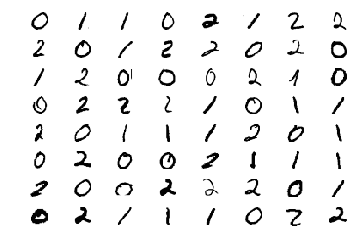

In [41]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(test_x_inputs[randint(0, testsamplesize)]).reshape(28,28), cmap='Greys')
plt.show()

In [42]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)

px_outputs = softmax(np.array(outputs).reshape(testsamplesize, number_of_classification), axis=1)
# the index of maximum in each line
pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
pred_outputs[pred_outputs==2] = numbers[2]
pred_outputs[pred_outputs==1] = numbers[1]
pred_outputs[pred_outputs==0] = numbers[0]

real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

acc = np.sum(pred_outputs == real_outputs)/testsamplesize
print("Accuracy: {}".format(acc))

Accuracy: 0.9066666666666666


In [51]:
visualize.draw_net(config, winner, prune_unused=False)
visualize.plot_stats(stats, ylog=False, view=False)
visualize.plot_species(stats, view=False)

In [11]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False

In [16]:
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [13]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = [0,1,2] + config.genome_config.input_keys + used_nodes[3:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

In [14]:
v = [0, 1, 2]
list_connections = []
for vi in v:
    for u in range(3, len(config.genome_config.input_keys) + 3):
        list_connections.append(g.isReachable(u, vi))

In [19]:
nodes_inputs = range(3, 3+ 784)
nodes_outputs = range(3)
nodes_mid = range(3 + 784, len(dict_nodes))

In [20]:
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

In [23]:
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

In [25]:
nodes_tuples_fixed_list = []
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)
                number_of_nodes += 1
    length_of_layers.append(number_of_nodes)
length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

In [27]:
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

In [28]:
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])

In [43]:
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)
length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

In [44]:
length_of_each_layer

[188, 13, 2, 3]

In [46]:
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

In [48]:
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

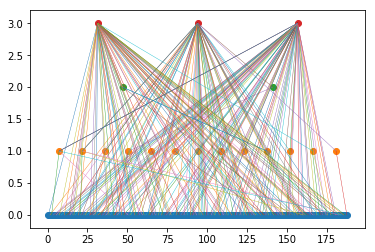

In [50]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()